In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('spatiotemporal_data2.csv')
df.head()

C:\Users\kakka\AppData\Local\Temp\ipykernel_26256\1765774220.py:1: DtypeWarning: Columns (37,52,53,54) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('spatiotemporal_data.csv')


,_id_x,id,index,period,timestamp,minute,second,type.id,type.name,possession,...,teammate_coordinates_pressure,goalkeeper_coordinates_pressure,opposition_coordinates_pressure,change_in_opp_distance,total_vec,vec_dot,distance_from_goal,distance_from_goal_pressure,difference_in_actor_pos,spec_metric
0,66ba38692d4a508f96672224,7fd797d5-530c-4e27-bac7-8fa097c95abc,28,1,00:00:16.035,0,16,30,Pass,2,...,"[(46.963998884170216, 40.959242431768956), (47...",[],"[(53.296377210343, 15.00805897815134), (56.977...",1.489272,"(-1.3571502393310553, 0.8255097391104442)",1.588497,58.646396,73.120722,-14.474326,0.040338
1,66ba38692d4a508f96672228,76ebbb25-3467-413b-8497-f3e38f998e57,32,1,00:00:17.549,0,17,30,Pass,2,...,"[(44.558367602139725, 46.40208098715321), (46....",[],"[(53.066373201507204, 19.714309329722326), (53...",0.525411,"(-0.8422803236949079, -0.14513565033561804)",0.854693,59.281784,65.280471,-5.998687,0.007575
2,66ba38692d4a508f9667224e,7a9e0311-6936-4f6d-aa56-90c0e6ff7b58,70,1,00:00:58.628,0,58,30,Pass,3,...,"[(6.714193372865395, 45.56086349235413), (24.2...",[],"[(23.950768739952096, 20.129863604691536), (29...",0.621020,"(0.8506353781881018, 0.2718375999246092)",0.893015,44.553901,86.983330,-42.429429,0.012447
3,66ba38692d4a508f96672258,c970a836-e82c-4702-963a-b53ee7e29864,80,1,00:01:05.668,1,5,30,Pass,4,...,"[(61.536963943339074, 54.38025911927402), (65....",[],"[(67.69758685187867, 48.15404577082967), (68.6...",0.943252,"(4.086891220895922, 1.9517164972034422)",4.529004,71.688006,50.932210,20.755796,0.059591
4,66ba38692d4a508f96672279,df15686a-ba1d-4b9f-821e-06ca46e7539a,113,1,00:01:58.572,1,58,30,Pass,6,...,"[(52.33987655842175, 27.529620164654446), (52....",[],"[(53.30209712437586, 53.46809217747618), (54.1...",0.993861,"(3.854880484027703, 2.8908925615534713)",4.818440,77.954985,63.881528,14.073457,0.061431


In [3]:
# Define features and target
X = df[['teammates_behind', 'teammates_in_front', 'opposition_behind', 'opposition_min_distance', 'teammate_min_distance', 'visible_area_calculated', 'teammates_traingle_area_min', 'teammates_middle_third_area', 'opposition_left_third_area', 'opposite_half_area', 'conincidence_area', 'teammates_traingle_area_max', 'opposition_avg_distance', 'teammates_right_third_area', 'conincidence_own_half_area', 'passing_channels_blocked_m', 'teammates_traingle_count','distance_from_goal','distance_from_goal_pressure','difference_in_actor_pos','vec_dot','spec_metric']]
y1 = df['class_3']
y2  = df['class_2']
y3  = df['class_1']
y3 = y3.replace(-1, 0)

In [4]:
X.fillna(0,inplace=True)

C:\Users\kakka\AppData\Local\Temp\ipykernel_26256\460773024.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0,inplace=True)


In [11]:

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y2, test_size=0.25, stratify=y2, random_state=42
)


In [79]:
# RandomForest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# DecisionTree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

# XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)

# Another Classifier (e.g., Logistic Regression with OvR strategy for multiclass)
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(multi_class='ovr', random_state=42)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

C:\Users\kakka\PycharmProjects\ProjectF\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

# Train RandomForest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

print(y_train.unique())
# Evaluate RandomForest
print("RandomForestClassifier")
print(classification_report(y_test, rf_predictions))

# For AUC, compute probabilities and plot ROC curve
rf_probabilities = rf_model.predict_proba(X_test)
# Compute ROC Curve

[0 1]
RandomForestClassifier
              precision    recall  f1-score   support

           0       0.59      0.56      0.57      2819
           1       0.65      0.68      0.67      3418

    accuracy                           0.63      6237
   macro avg       0.62      0.62      0.62      6237
weighted avg       0.62      0.63      0.62      6237


Shape of y_test: (6237,)
Shape of logreg_probabilities: (6237, 2)


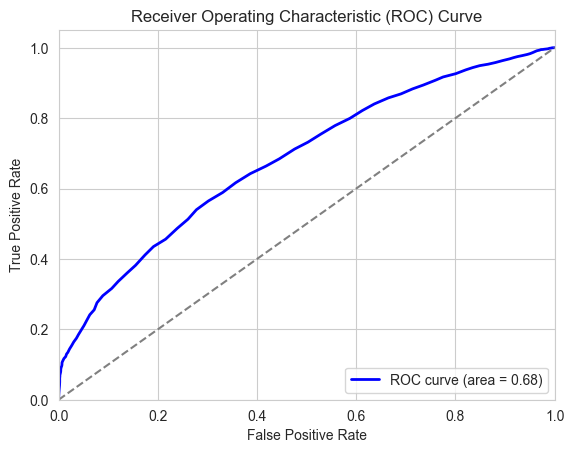

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Ensure y_test is a 1D array with binary labels
y_test = np.array(y_test).ravel()  # Flatten to ensure it's a 1D array
logreg_probabilities = np.array(rf_probabilities)  # Ensure logreg_probabilities is a numpy array

# Check the shapes
print("Shape of y_test:", y_test.shape)
print("Shape of logreg_probabilities:", rf_probabilities.shape)

# Compute ROC curve and ROC area for the positive class (class 1)
fpr, tpr, _ = roc_curve(y_test, rf_probabilities[:, 1])  # Positive class is class 1
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [24]:
from sklearn.tree import DecisionTreeClassifier

# Train DecisionTree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

# Evaluate DecisionTree
print("DecisionTreeClassifier")
# print(classification_report(y_test, dt_predictions))
print(classification_report(y_test, dt_predictions))
# For AUC
dt_probabilities = dt_model.predict_proba(X_test)


DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.52      0.53      0.53      3525
           1       0.61      0.61      0.61      4271

    accuracy                           0.57      7796
   macro avg       0.57      0.57      0.57      7796
weighted avg       0.57      0.57      0.57      7796


Shape of y_test: (7796,)
Shape of logreg_probabilities: (7796, 2)


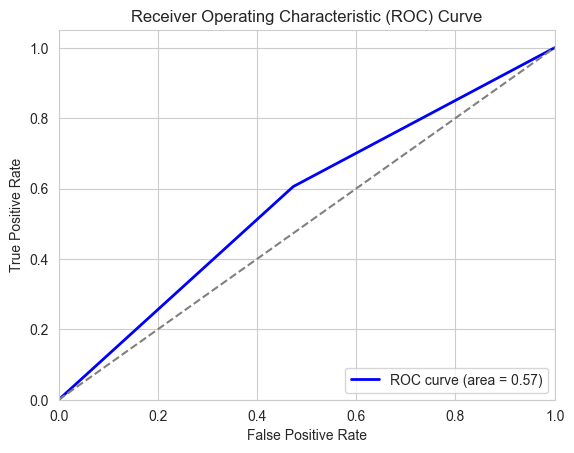

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Ensure y_test is a 1D array with binary labels
y_test = np.array(y_test).ravel()  # Flatten to ensure it's a 1D array
dt_probabilities = np.array(dt_probabilities)  # Ensure logreg_probabilities is a numpy array

# Check the shapes
print("Shape of y_test:", y_test.shape)
print("Shape of logreg_probabilities:", dt_probabilities.shape)

# Compute ROC curve and ROC area for the positive class (class 1)
fpr, tpr, _ = roc_curve(y_test, dt_probabilities[:, 1])  # Positive class is class 1
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [84]:
import xgboost as xgb

# Train XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)

# Evaluate XGBoost
print("XGBoostClassifier")
print(classification_report(y_test, xgb_predictions))

# For AUC
xgb_probabilities = xgb_model.predict_proba(X_test)


XGBoostClassifier
              precision    recall  f1-score   support

           0       0.60      0.58      0.59      2819
           1       0.66      0.68      0.67      3418

    accuracy                           0.63      6237
   macro avg       0.63      0.63      0.63      6237
weighted avg       0.63      0.63      0.63      6237


Shape of y_test: (6237,)
Shape of logreg_probabilities: (6237, 2)


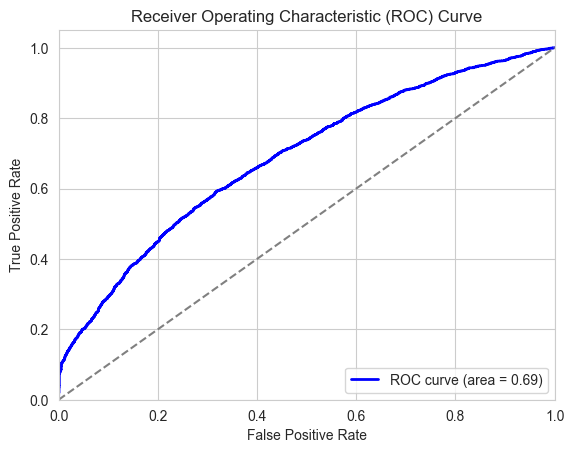

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Ensure y_test is a 1D array with binary labels
y_test = np.array(y_test).ravel()  # Flatten to ensure it's a 1D array
xgb_probabilities = np.array(xgb_probabilities)  # Ensure logreg_probabilities is a numpy array

# Check the shapes
print("Shape of y_test:", y_test.shape)
print("Shape of logreg_probabilities:", xgb_probabilities.shape)

# Compute ROC curve and ROC area for the positive class (class 1)
fpr, tpr, _ = roc_curve(y_test, xgb_probabilities[:, 1])  # Positive class is class 1
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [86]:
from sklearn.svm import SVC

# Train SVM
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

# Evaluate SVM
print("SVM Classifier")
print(classification_report(y_test, svm_predictions))



SVM Classifier
              precision    recall  f1-score   support

           0       0.57      0.42      0.48      2819
           1       0.61      0.74      0.67      3418

    accuracy                           0.60      6237
   macro avg       0.59      0.58      0.58      6237
weighted avg       0.59      0.60      0.59      6237


In [87]:
# For AUC
svm_probabilities = svm_model.predict_proba(X_test)

Shape of y_test: (6237,)
Shape of logreg_probabilities: (6237, 2)


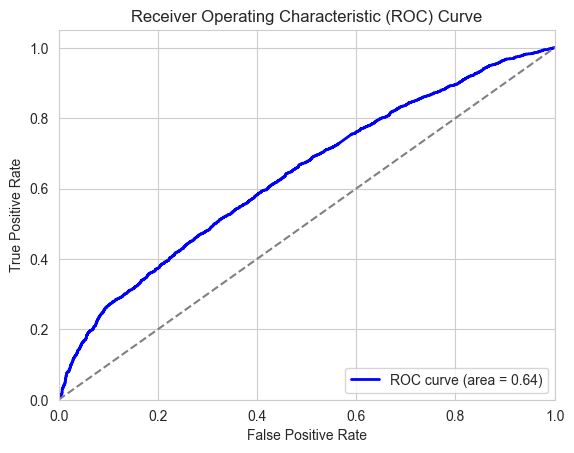

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Ensure y_test is a 1D array with binary labels
y_test = np.array(y_test).ravel()  # Flatten to ensure it's a 1D array
logreg_probabilities = np.array(svm_probabilities)  # Ensure logreg_probabilities is a numpy array

# Check the shapes
print("Shape of y_test:", y_test.shape)
print("Shape of logreg_probabilities:", svm_probabilities.shape)

# Compute ROC curve and ROC area for the positive class (class 1)
fpr, tpr, _ = roc_curve(y_test, svm_probabilities[:, 1])  # Positive class is class 1
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [89]:
from sklearn.naive_bayes import MultinomialNB

# Train Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)

print(classification_report(y_test, nb_predictions))

ValueError: Negative values in data passed to MultinomialNB (input X)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Ensure y_test is a 1D array with binary labels
y_test = np.array(y_test).ravel()  # Flatten to ensure it's a 1D array
logreg_probabilities = np.array(gbm_probabilities)  # Ensure logreg_probabilities is a numpy array

# Check the shapes
print("Shape of y_test:", y_test.shape)
print("Shape of logreg_probabilities:", gbm_probabilities.shape)

# Compute ROC curve and ROC area for the positive class (class 1)
fpr, tpr, _ = roc_curve(y_test, gbm_probabilities[:, 1])  # Positive class is class 1
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [90]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression
logreg_model = LogisticRegression(multi_class='ovr', max_iter=1000, random_state=42)
logreg_model.fit(X_train, y_train)
logreg_predictions = logreg_model.predict(X_test)

# Evaluate Logistic Regression
print("Logistic Regression Classifier")
print(classification_report(y_test, logreg_predictions))

logreg_probabilities = logreg_model.predict_proba(X_test)


Logistic Regression Classifier
              precision    recall  f1-score   support

           0       0.59      0.56      0.57      2819
           1       0.65      0.68      0.67      3418

    accuracy                           0.63      6237
   macro avg       0.62      0.62      0.62      6237
weighted avg       0.62      0.63      0.62      6237


C:\Users\kakka\PycharmProjects\ProjectF\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [91]:
print("Sample of y_test_bin:", y_test_bin[:5])  # Print the first 5 samples

Sample of y_test_bin: [[1]
 [1]
 [0]
 [1]
 [1]]


Shape of y_test: (6237,)
Shape of logreg_probabilities: (6237, 2)


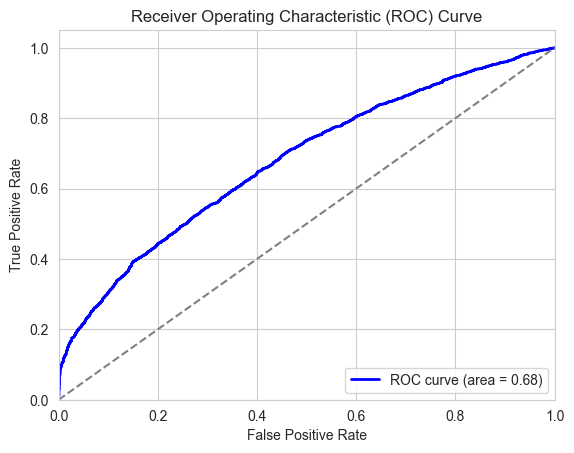

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Ensure y_test is a 1D array with binary labels
y_test = np.array(y_test).ravel()  # Flatten to ensure it's a 1D array
logreg_probabilities = np.array(logreg_probabilities)  # Ensure logreg_probabilities is a numpy array

# Check the shapes
print("Shape of y_test:", y_test.shape)
print("Shape of logreg_probabilities:", logreg_probabilities.shape)

# Compute ROC curve and ROC area for the positive class (class 1)
fpr, tpr, _ = roc_curve(y_test, logreg_probabilities[:, 1])  # Positive class is class 1
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [14]:
from sklearn.ensemble import GradientBoostingClassifier

# Train GBM
gbm_model = GradientBoostingClassifier(learning_rate=0.1, max_depth= 5, min_samples_split= 5, n_estimators = 100,random_state=42)
gbm_model.fit(X_train, y_train)
gbm_predictions = gbm_model.predict(X_test)

# Evaluate Logistic Regression
print("GradientBoostingClassifier")
print(classification_report(y_test, gbm_predictions))

gbm_probabilities = gbm_model.predict_proba(X_test)

GradientBoostingClassifier
              precision    recall  f1-score   support

           0       0.62      0.56      0.59      3525
           1       0.67      0.72      0.69      4271

    accuracy                           0.65      7796
   macro avg       0.64      0.64      0.64      7796
weighted avg       0.65      0.65      0.65      7796


In [15]:
import joblib
# Save the model to a file
model_filename = 'gradient_boosting_model.pkl'
joblib.dump(gbm_model, model_filename)
print(f"Model saved to {model_filename}")

Model saved to gradient_boosting_model.pkl



Feature Importances:
                        Feature  Importance
19      difference_in_actor_pos    0.179895
18  distance_from_goal_pressure    0.134425
2             opposition_behind    0.072710
1            teammates_in_front    0.062856
0              teammates_behind    0.060150
17           distance_from_goal    0.052140
20                      vec_dot    0.049256
21                  spec_metric    0.044902
3       opposition_min_distance    0.042456
4         teammate_min_distance    0.040064
7   teammates_middle_third_area    0.034450
6   teammates_traingle_area_min    0.034040
11  teammates_traingle_area_max    0.032212
12      opposition_avg_distance    0.031490
9            opposite_half_area    0.031391
5       visible_area_calculated    0.028486
10            conincidence_area    0.022609
14   conincidence_own_half_area    0.013762
8    opposition_left_third_area    0.009820
13   teammates_right_third_area    0.009220
15   passing_channels_blocked_m    0.008849
16     tea

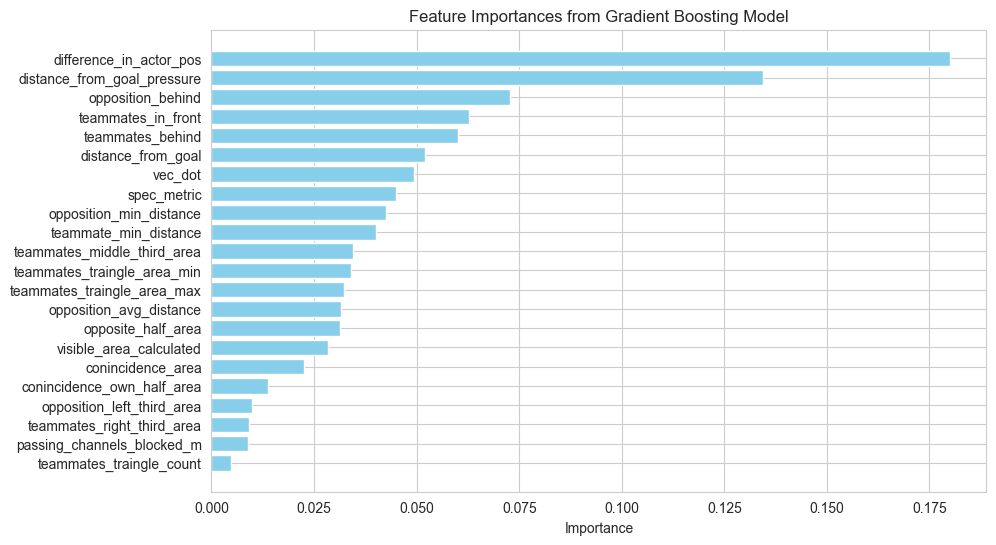

In [16]:
# Get feature importances
feature_importances = gbm_model.feature_importances_

# Create a DataFrame to report feature importances
feature_names = X_train.columns  # Assuming X_train is a DataFrame with column names
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print and report feature importances
print("\nFeature Importances:")
print(importance_df)

# Optionally, plot feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances from Gradient Boosting Model')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()

In [17]:
from sklearn.metrics import classification_report, accuracy_score

# Predictions on training data
gbm_train_predictions = gbm_model.predict(X_train)
print("Training Performance:")
print(classification_report(y_train, gbm_train_predictions))

# Predictions on test data
gbm_test_predictions = gbm_model.predict(X_test)
print("Test Performance:")
print(classification_report(y_test, gbm_test_predictions))

# Print accuracy scores for comparison
print("Training Accuracy:", accuracy_score(y_train, gbm_train_predictions))
print("Test Accuracy:", accuracy_score(y_test, gbm_test_predictions))

Training Performance:
              precision    recall  f1-score   support

           0       0.72      0.65      0.68     10572
           1       0.73      0.79      0.76     12813

    accuracy                           0.73     23385
   macro avg       0.73      0.72      0.72     23385
weighted avg       0.73      0.73      0.73     23385

Test Performance:
              precision    recall  f1-score   support

           0       0.62      0.56      0.59      3525
           1       0.67      0.72      0.69      4271

    accuracy                           0.65      7796
   macro avg       0.64      0.64      0.64      7796
weighted avg       0.65      0.65      0.65      7796

Training Accuracy: 0.7268762026940346
Test Accuracy: 0.6473832734735762


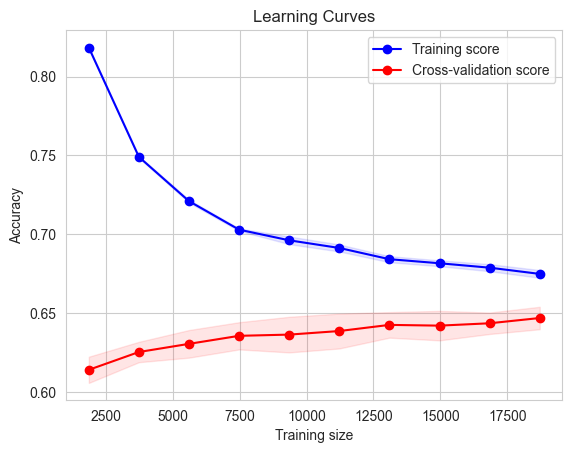

In [18]:
from sklearn.model_selection import learning_curve

# Compute learning curves
train_sizes, train_scores, test_scores = learning_curve(
    GradientBoostingClassifier(random_state=42),
    X_train, y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),  # 10 different training sizes
    scoring='accuracy'
)

# Compute mean and std deviation for training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.figure()
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
plt.plot(train_sizes, test_mean, 'o-', color='red', label='Cross-validation score')

# Plot shaded area for std deviation
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='red')

plt.xlabel('Training size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend(loc='best')
plt.grid(True)
plt.show()


In [19]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(gbm_model, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation results
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))
print("Standard deviation of cross-validation scores:", np.std(cv_scores))


Cross-validation scores: [0.64892025 0.64528544 0.6429335  0.65533462 0.64314732]
Mean cross-validation score: 0.647124224930511
Standard deviation of cross-validation scores: 0.004634550555856348


Shape of y_test: (7796,)
Shape of logreg_probabilities: (7796, 2)


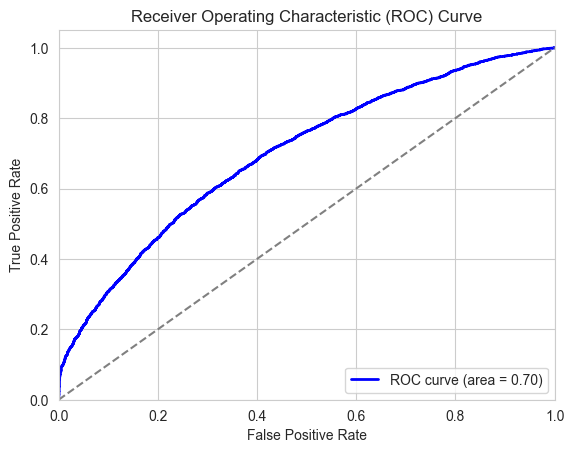

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Ensure y_test is a 1D array with binary labels
y_test = np.array(y_test).ravel()  # Flatten to ensure it's a 1D array
logreg_probabilities = np.array(gbm_probabilities)  # Ensure logreg_probabilities is a numpy array

# Check the shapes
print("Shape of y_test:", y_test.shape)
print("Shape of logreg_probabilities:", gbm_probabilities.shape)

# Compute ROC curve and ROC area for the positive class (class 1)
fpr, tpr, _ = roc_curve(y_test, gbm_probabilities[:, 1])  # Positive class is class 1
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [23]:
import pandas as pd
import joblib
from sklearn.impute import SimpleImputer

# Load the data
df = pd.read_csv('spatiotemporal_data.csv')

# Define the features for prediction
X = df[['teammates_behind', 'teammates_in_front', 'opposition_behind', 
        'opposition_min_distance', 'teammate_min_distance', 'visible_area_calculated', 
        'teammates_traingle_area_min', 'teammates_middle_third_area', 
        'opposition_left_third_area', 'opposite_half_area', 'conincidence_area', 
        'teammates_traingle_area_max', 'opposition_avg_distance', 
        'teammates_right_third_area', 'conincidence_own_half_area', 
        'passing_channels_blocked_m', 'teammates_traingle_count', 
        'distance_from_goal', 'distance_from_goal_pressure', 
        'difference_in_actor_pos', 'vec_dot', 'spec_metric']]

# Handle missing values (fill with mean or any other strategy)
imputer = SimpleImputer(strategy='mean')  # or strategy='median', strategy='constant', etc.
X_filled = imputer.fit_transform(X)  # Fit and transform

# Load the trained model
model_filename = 'gradient_boosting_model.pkl'
gbm_model = joblib.load(model_filename)

# Predict using the loaded model
df['predictions'] = gbm_model.predict(X_filled)

# Get the predicted probabilities
probabilities = gbm_model.predict_proba(X_filled)

# Convert probabilities to a DataFrame and concatenate with original DataFrame
prob_df = pd.DataFrame(probabilities, columns=[f'prob_class_{i}' for i in range(probabilities.shape[1])])
df = pd.concat([df, prob_df], axis=1)

# Save the updated DataFrame with predictions and probabilities
df.to_csv('spatiotemporal_data_with_predictions_and_probabilities.csv', index=False)

print("Predictions and probabilities added and saved to 'spatiotemporal_data_with_predictions_and_probabilities.csv'.")


C:\Users\kakka\AppData\Local\Temp\ipykernel_26256\319561015.py:6: DtypeWarning: Columns (37,52,53,54) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('spatiotemporal_data.csv')
C:\Users\kakka\PycharmProjects\ProjectF\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
C:\Users\kakka\PycharmProjects\ProjectF\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


Predictions and probabilities added and saved to 'spatiotemporal_data_with_predictions_and_probabilities.csv'.


K-Nearest Neighbors Classifier
              precision    recall  f1-score   support

           0       0.51      0.47      0.49      2819
           1       0.59      0.63      0.61      3418

    accuracy                           0.56      6237
   macro avg       0.55      0.55      0.55      6237
weighted avg       0.56      0.56      0.56      6237


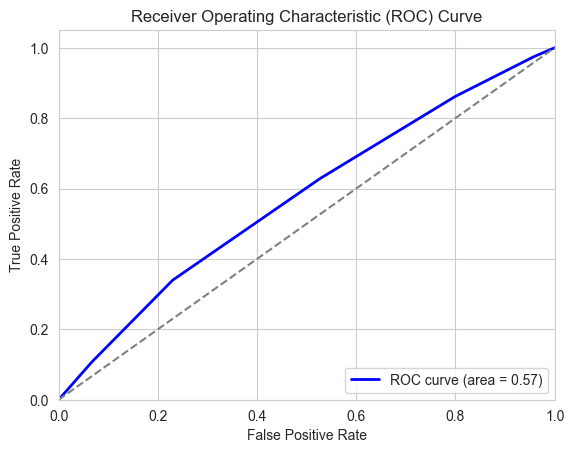

In [95]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Train KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

# Evaluate KNN
print("K-Nearest Neighbors Classifier")
print(classification_report(y_test, knn_predictions))

# Get probabilities for the positive class (class 1)
knn_probabilities = knn_model.predict_proba(X_test)

# Compute ROC curve and ROC area for the positive class (class 1)
fpr, tpr, _ = roc_curve(y_test, knn_probabilities[:, 1])  # Positive class is class 1
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [100]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report

# Assuming models are already trained: gbm_model, logreg_model, xgb_model, rf_model

# Create a voting classifier with the models
voting_clf = VotingClassifier(
    estimators=[
        ('gbm', gbm_model),
        ('logreg', logreg_model),
        ('xgb', xgb_model),
        ('rf', rf_model)
    ],
    voting='soft'  # Use 'soft' voting to average probabilities, 'hard' voting uses predicted classes
)

# Train the voting classifier
voting_clf.fit(X_train, y_train)

# Make predictions
voting_predictions = voting_clf.predict(X_test)

# Evaluate the voting classifier
print("Voting Classifier")
print(classification_report(y_test, voting_predictions))


C:\Users\kakka\PycharmProjects\ProjectF\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Voting Classifier
              precision    recall  f1-score   support

           0       0.61      0.57      0.59      2819
           1       0.66      0.70      0.68      3418

    accuracy                           0.64      6237
   macro avg       0.64      0.63      0.63      6237
weighted avg       0.64      0.64      0.64      6237


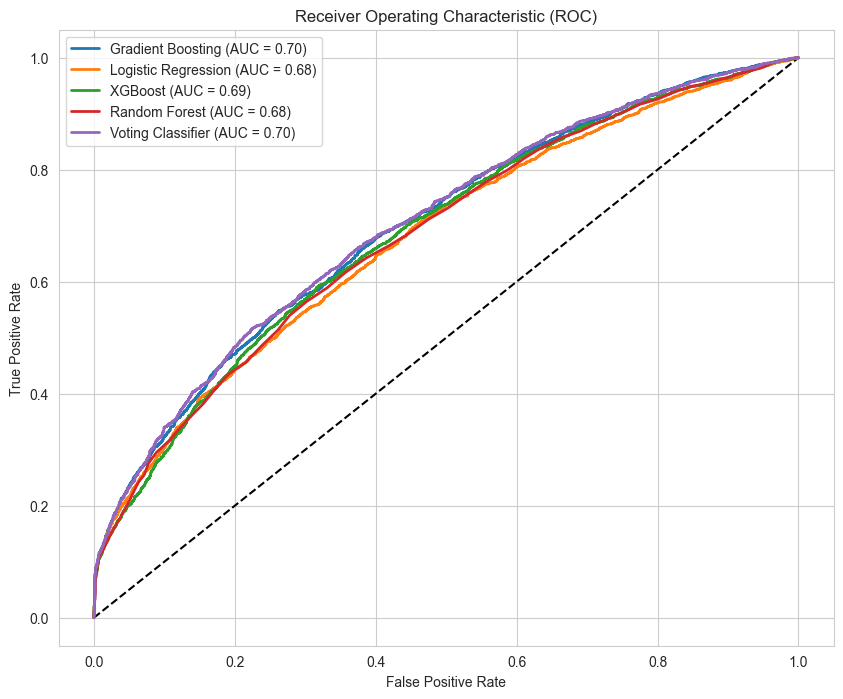

In [101]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Helper function to plot ROC curve
def plot_roc_curve(fpr, tpr, label):
    plt.plot(fpr, tpr, linewidth=2, label=label)

# Compute ROC for each classifier and the voting classifier
def compute_and_plot_roc(classifiers, X_test, y_test):
    plt.figure(figsize=(10, 8))
    plt.plot([0, 1], [0, 1], 'k--')

    for name, model in classifiers:
        if hasattr(model, 'predict_proba'):
            y_prob = model.predict_proba(X_test)
            fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1], pos_label=1)
            plot_roc_curve(fpr, tpr, f'{name} (AUC = {auc(fpr, tpr):.2f})')

    # Plot ROC for the voting classifier
    if hasattr(voting_clf, 'predict_proba'):
        y_prob = voting_clf.predict_proba(X_test)
        fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1], pos_label=1)
        plot_roc_curve(fpr, tpr, f'Voting Classifier (AUC = {auc(fpr, tpr):.2f})')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='best')
    plt.show()

# Define classifiers for ROC curve plotting
classifiers = [
    ('Gradient Boosting', gbm_model),
    ('Logistic Regression', logreg_model),
    ('XGBoost', xgb_model),
    ('Random Forest', rf_model)
]

compute_and_plot_roc(classifiers, X_test, y_test)


In [102]:
from sklearn.model_selection import cross_val_score
import numpy as np

def check_overfitting(model, X_train, y_train, X_test, y_test):
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print(f"{model.__class__.__name__} - Training Accuracy: {train_score:.4f}")
    print(f"{model.__class__.__name__} - Test Accuracy: {test_score:.4f}")

# Check overfitting for each model
for model in [gbm_model, logreg_model, xgb_model, rf_model, voting_clf]:
    check_overfitting(model, X_train, y_train, X_test, y_test)



GradientBoostingClassifier - Training Accuracy: 0.6702
GradientBoostingClassifier - Test Accuracy: 0.6378
LogisticRegression - Training Accuracy: 0.6328
LogisticRegression - Test Accuracy: 0.6251
XGBClassifier - Training Accuracy: 0.8418
XGBClassifier - Test Accuracy: 0.6320
RandomForestClassifier - Training Accuracy: 1.0000
RandomForestClassifier - Test Accuracy: 0.6259
VotingClassifier - Training Accuracy: 0.9141
VotingClassifier - Test Accuracy: 0.6405


C:\Users\kakka\PycharmProjects\ProjectF\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kakka\PycharmProjects\ProjectF\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

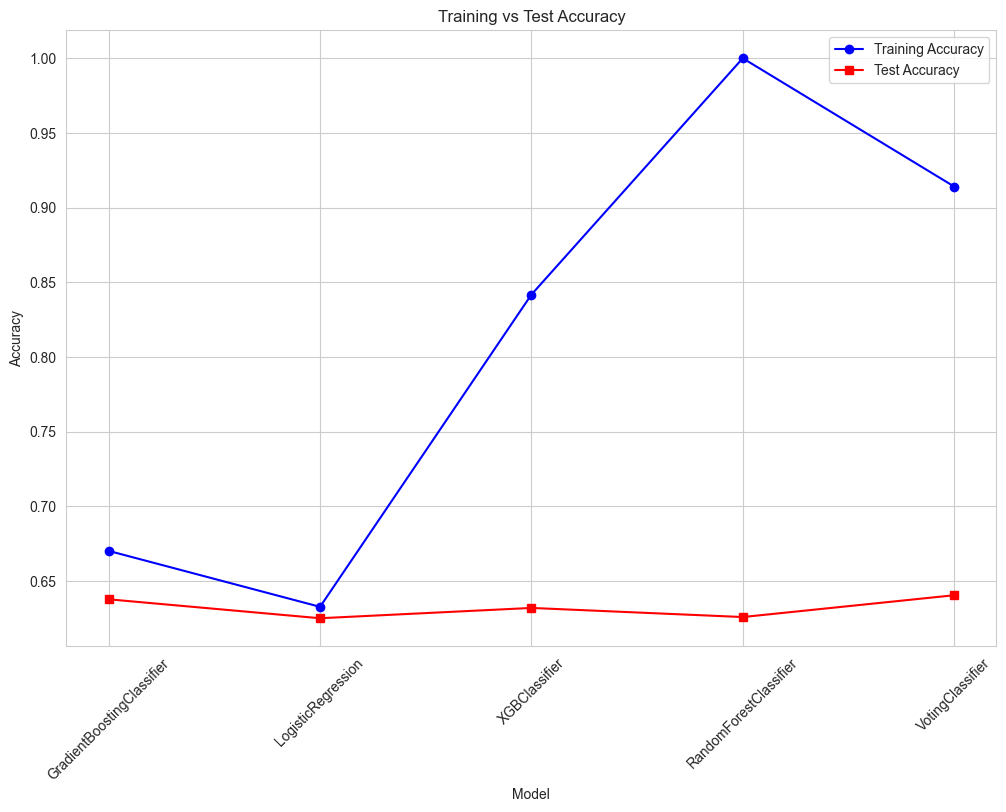

In [103]:
import matplotlib.pyplot as plt

def plot_overfitting(models, X_train, y_train, X_test, y_test):
    train_accuracies = []
    test_accuracies = []
    model_names = []

    for model in models:
        model_name = model.__class__.__name__
        model_names.append(model_name)
        model.fit(X_train, y_train)
        train_acc = model.score(X_train, y_train)
        test_acc = model.score(X_test, y_test)
        train_accuracies.append(train_acc)
        test_accuracies.append(test_acc)
    
    x = range(len(models))
    plt.figure(figsize=(12, 8))
    plt.plot(x, train_accuracies, 'o-', label='Training Accuracy', color='blue')
    plt.plot(x, test_accuracies, 's-', label='Test Accuracy', color='red')
    plt.xticks(x, model_names, rotation=45)
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    plt.title('Training vs Test Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

# List of models for overfitting analysis
models = [gbm_model, logreg_model, xgb_model, rf_model, voting_clf]
plot_overfitting(models, X_train, y_train, X_test, y_test)


C:\Users\kakka\PycharmProjects\ProjectF\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kakka\PycharmProjects\ProjectF\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

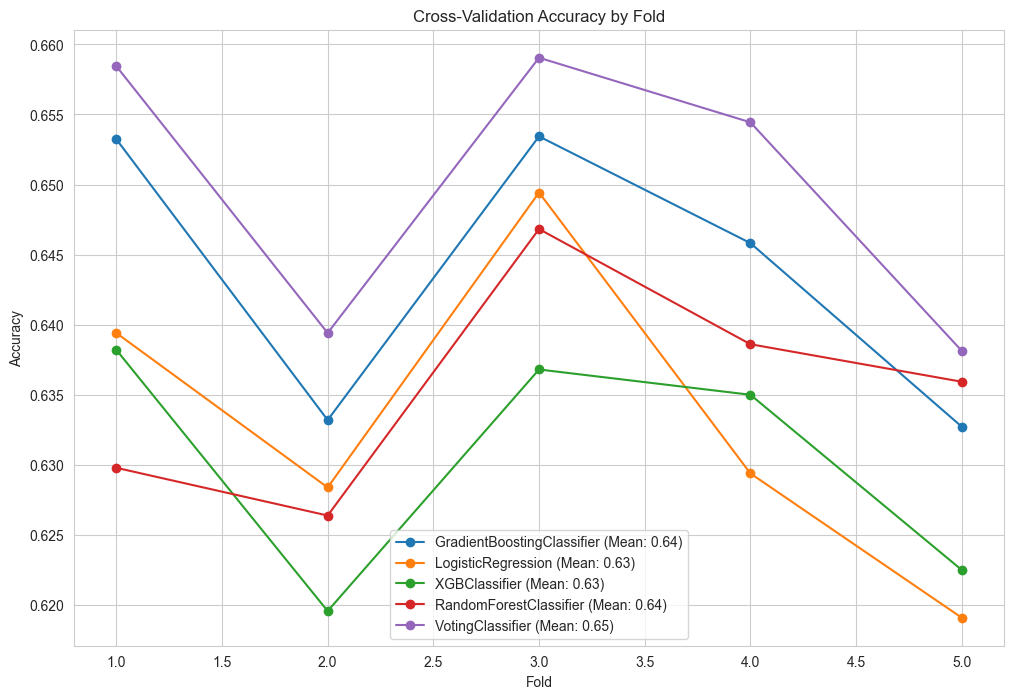

In [104]:
def plot_cross_validation(models, X, y):
    plt.figure(figsize=(12, 8))

    for model in models:
        scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
        plt.plot(range(1, 6), scores, marker='o', label=f'{model.__class__.__name__} (Mean: {scores.mean():.2f})')

    plt.xlabel('Fold')
    plt.ylabel('Accuracy')
    plt.title('Cross-Validation Accuracy by Fold')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot cross-validation scores
plot_cross_validation(models, X_train, y_train)


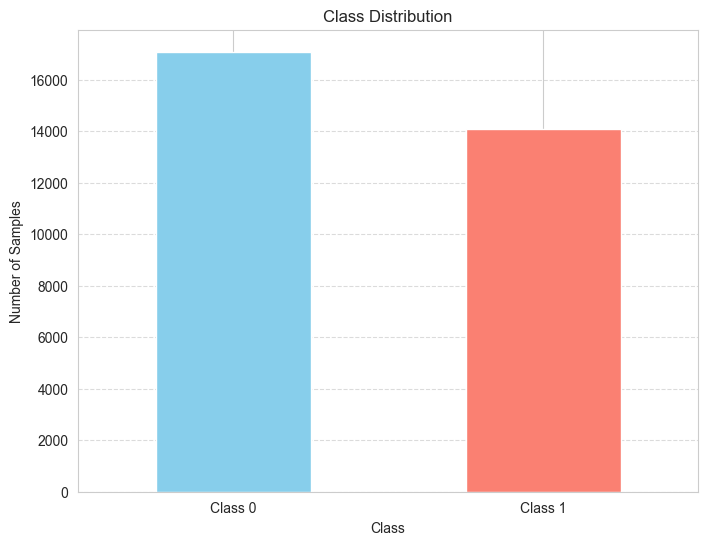

In [105]:
import matplotlib.pyplot as plt

def plot_class_distribution(y):
    plt.figure(figsize=(8, 6))
    y.value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
    plt.title('Class Distribution')
    plt.xlabel('Class')
    plt.ylabel('Number of Samples')
    plt.xticks(ticks=[0, 1], labels=['Class 0', 'Class 1'], rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Assuming y_train contains the binary target variable 'class_2'
plot_class_distribution(y2)


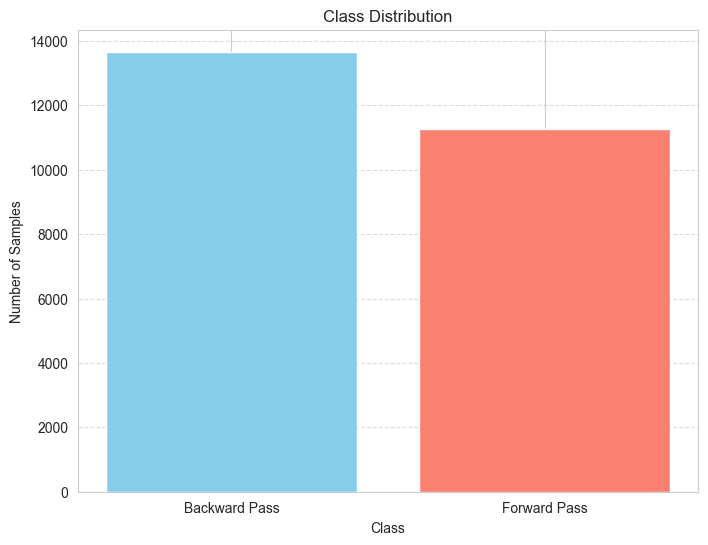

In [108]:
import matplotlib.pyplot as plt

def plot_class_distribution(y):
    plt.figure(figsize=(8, 6))
    class_counts = y.value_counts()
    class_labels = ['Backward Pass', 'Forward Pass']
    plt.bar(class_labels, class_counts, color=['skyblue', 'salmon'])
    plt.title('Class Distribution')
    plt.xlabel('Class')
    plt.ylabel('Number of Samples')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Assuming y_train contains the binary target variable 'class_2'
plot_class_distribution(y_train)


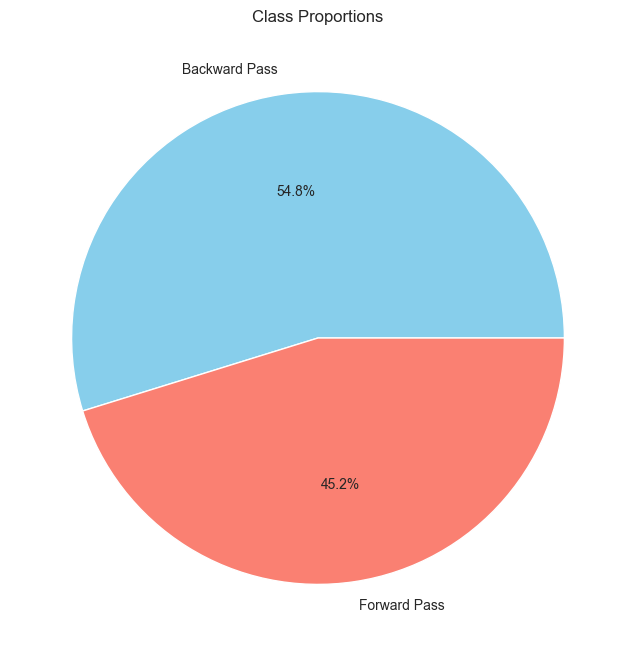

In [109]:
def plot_class_pie(y):
    plt.figure(figsize=(8, 8))
    class_counts = y.value_counts()
    class_labels = ['Backward Pass', 'Forward Pass']
    plt.pie(class_counts, labels=class_labels, autopct='%1.1f%%', colors=['skyblue', 'salmon'])
    plt.title('Class Proportions')
    plt.show()

# Use y_train or y_test to plot
plot_class_pie(y_train)
